In [1]:
a = (12 ** 2) + (13 **2) + (5.5**2) + (11 **2) + (16 **2)
print(a)
b = a / 5
print(b)

720.25
144.05


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

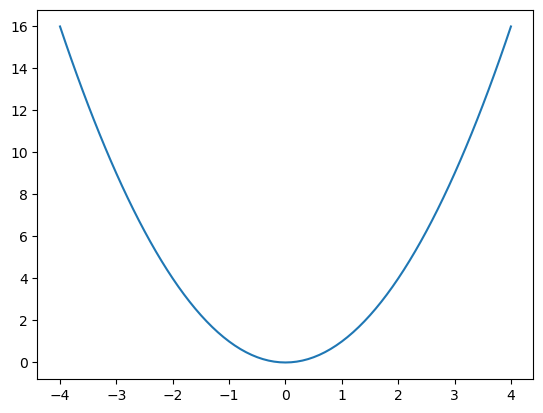

In [9]:
x_ = np.arange(-4, 4.1, 0.1)
y_ = x_**2

plt.plot(x_, y_)
plt.show()

## 경사하강법

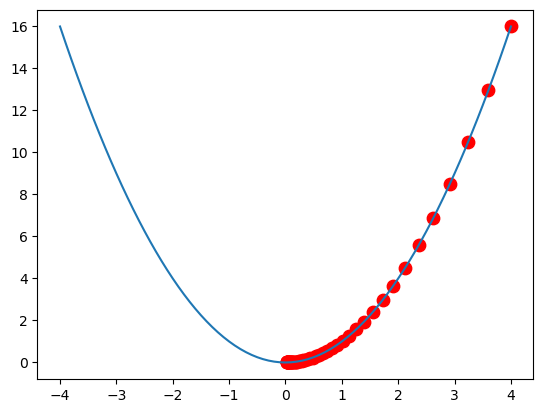

In [20]:
# initial value
x = 4
y = 16
lr = 0.05

for _ in range(50):
    plt.scatter(x, y, s = 80, c='r')
    dy_dx = 2 * x # 도함수, 미분
    x = x - lr * dy_dx
    y = x ** 2

plt.plot(x_, y_)
plt.show()

### learning rate가 큰 경우(발산하는 경우)

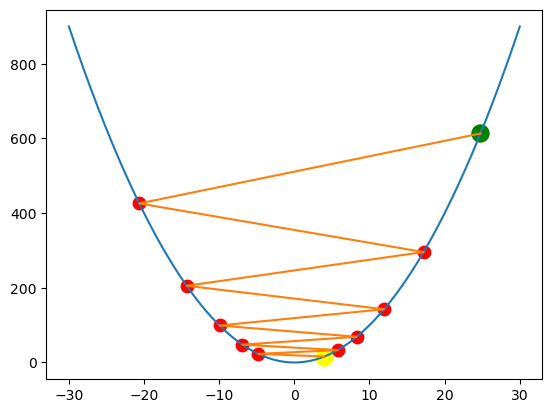

In [33]:
x_ = np.arange(-30, 30.1, 0.1)
y_ = x_ ** 2
plt.plot(x_, y_)

x = 4
y = 16
lr = 1.1

x1 = [4]
y1 = [16]

for i in range(10):
    dy_dx = 2 * x
    x = x - lr * dy_dx
    y = x ** 2

    x1.append(x)
    y1.append(y)


plt.scatter(x1, y1, s=80, c='red')
plt.scatter(x1[0], y1[0], s = 150, c='yellow')
plt.scatter(x1[-1], y1[-1], s = 150, c='green')
plt.plot(x1,y1)
plt.show()

### 선형 회귀 모델 실습 (강사님)

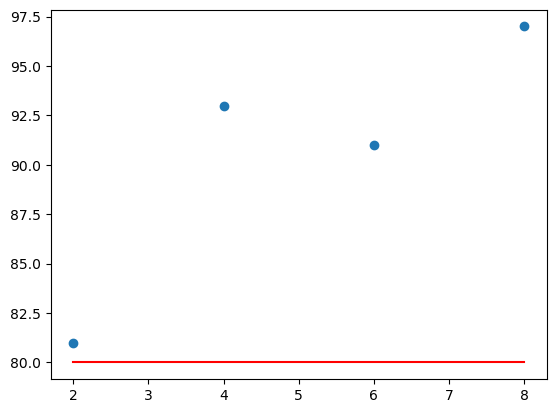

In [41]:
data = [[2,81],[4,93],[6,91],[8,97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

# 초기값 설정
x_fit = np.arange(2, 8.1, 0.1)
y_fit = 80 + 0 * x_fit

x = np.array(x)
y = np.array(y)

plt.scatter(x,y)
plt.plot(x_fit, y_fit, c='red')
plt.show()

iter = 0, slope = 18.56, intercept = 3.62
iter = 100, slope = 8.941589161698868, intercept = 39.365836291181544
iter = 200, slope = 5.76490640919045, intercept = 58.32292038635208
iter = 300, slope = 4.107636114212476, intercept = 68.21280074205256
iter = 400, slope = 3.2430408604221497, intercept = 73.37233545525181
iter = 500, slope = 2.791982903767777, intercept = 76.06405643662485


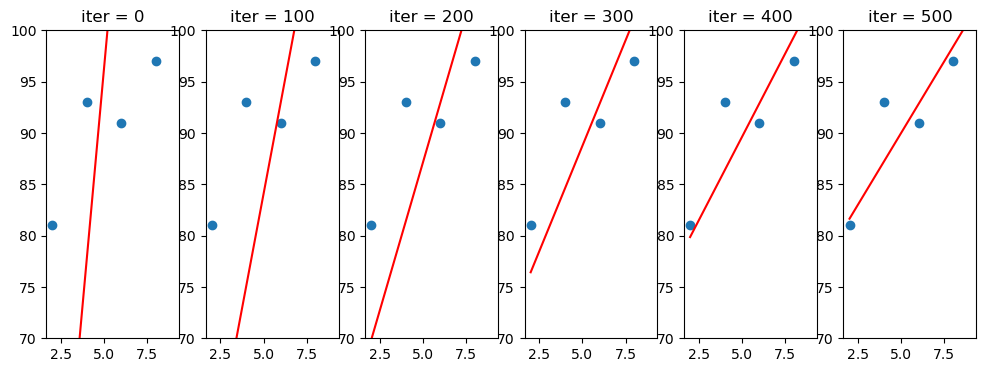

In [52]:
# 기울기 a와 절편 b 값 초기화
a, b = 0, 0

# learning rate
lr = 0.02
iter = 501

fig, ax = plt.subplots(1, 6, figsize = (12, 4))
x_fit = np.arange(2, 10)

j = 0

for i in range(iter):
    y_hat = a * x + b
    error = y - y_hat

    a_diff = -(2/len(x)) * sum(error * x) # 오차 함수를 a로 편미분한 값
    b_diff = -(2/len(x)) * sum(error) # 오차 함수를 b로 편미분한 값

    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print(f'iter = {i}, slope = {a}, intercept = {b}')

        ax[j].scatter(x, y)
        ax[j].plot(x_fit, b + a * x_fit, c='red')
        ax[j].set_title(f'iter = {i}')
        ax[j].set_ylim(70,100)
        j += 1
plt.show()

### 텐서플로에서 실행하는 선형 회귀

In [60]:
from tensorflow import keras
import tensorflow as tf

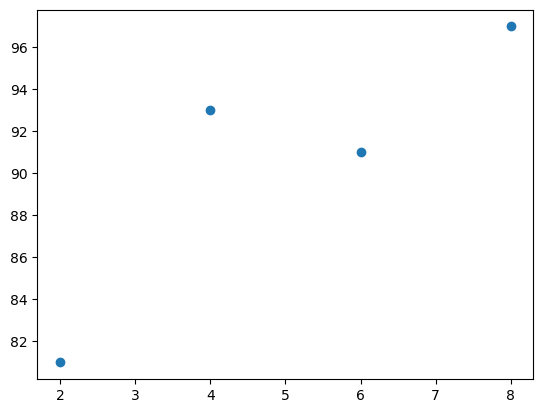

In [65]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

plt.scatter(x,y)
plt.show()

In [64]:
## tf model
model = keras.Sequential(name = 'regression')
model.add(keras.layers.Dense(1, input_shape = (1, ), activation = 'linear', name = 'output')) # regression 일 경우 activation 함수 linear

model.summary()

Model: "regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
## set learning parameter mse = 회귀분석, binary_crossentropy = 분류
model.compile(loss = 'mse', optimizer = 'sgd')

In [68]:
## learn weights
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 329ms/step - loss: 6759.2324
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 1830.9457
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1101.7220
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 989.2706
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 967.4425
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 958.9589
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 952.4695
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 946.3070
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 940.2263
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 934.1909
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 928.1955
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 922.2393
Epoch 13/500
1/1 [==============

In [73]:
## check parameters
slope = model.get_weights()[0][0]
intercept = model.get_weights()[1]
print(slope)
print(intercept)

[4.834657]
[63.874252]


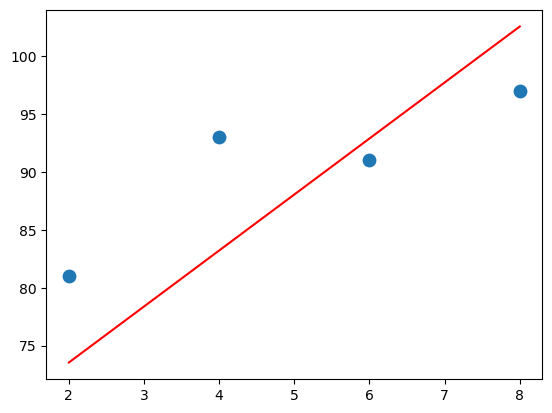

In [74]:
plt.scatter(x, y, s = 80)
plt.plot(x, x * slope + intercept, c = 'red')
plt.show()

In [75]:
model.predict(x)

1/1 [==============================] - 0s 68ms/step


array([[ 73.543564],
       [ 83.21288 ],
       [ 92.882195],
       [102.55151 ]], dtype=float32)

### 텐서플로에서 실행하는 다중 선형 회귀

In [79]:
from tensorflow import keras
import tensorflow as tf

x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81, 93, 91, 97])

model = keras.Sequential(name = 'multiple_regression')
model.add(keras.layers.Dense(1, input_dim=2, activation = 'linear', name = 'output')) # regression 일 경우 activation 함수 linear

model.summary()

Model: "multiple_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [80]:
## set learning parameter mse = 회귀분석, binary_crossentropy = 분류
model.compile(loss = 'mse', optimizer = 'sgd')

## learn weights
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 241ms/step - loss: 9207.2754
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1504.5649
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 957.3938
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 913.5052
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 905.0474
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 899.1160
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 893.3967
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 887.7264
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 882.0934
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 876.4967
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 870.9358
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 865.4108
Epoch 13/500
1/1 [===============

In [81]:
## check parameters
slope = model.get_weights()[0][0]
intercept = model.get_weights()[1]
print(slope)
print(intercept)

[3.7477627]
[62.42402]


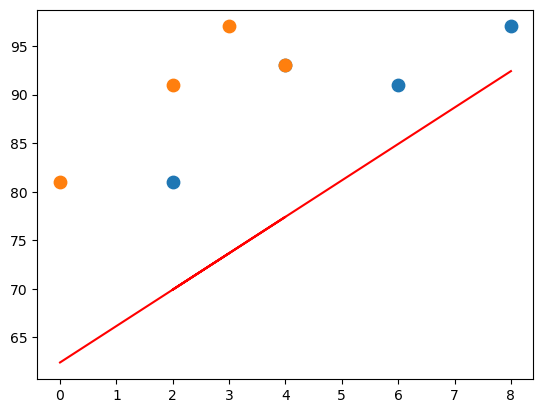

In [107]:
plt.scatter(x[:,0], y, s = 80)
plt.scatter(x[:,1], y, s = 80)
# plt.plot(x[:,0], x[:,0] * slope + intercept)
# plt.plot(x[:,1], x[:,1] * slope + intercept)
plt.plot(x, x * slope + intercept, c='red')
plt.show()

### 로지스틱 회귀 모델 연습

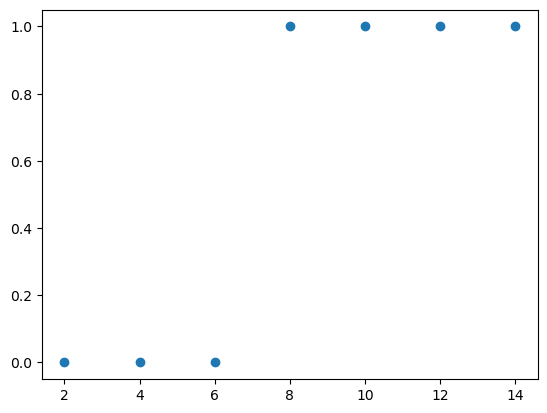

In [110]:
data = np.array([[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]])
## 0: normal, 1: cancer
x_data = data[:,0]
y_data = data[:,1]

plt.scatter(x_data, y_data)
plt.show()

In [111]:
def sigmoid(x, a, b):
    y = 1 / (1 + np.exp(-(a * x + b))) #exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return y

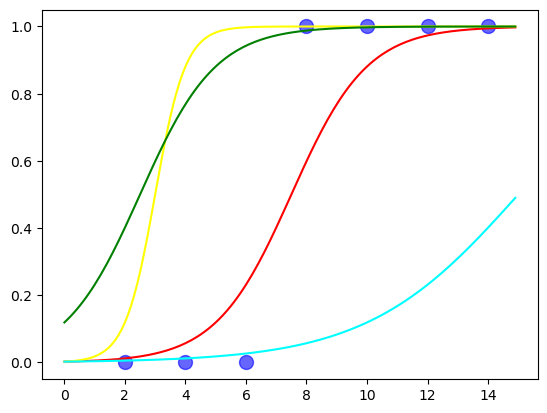

In [124]:
x_arange = np.arange(0,15,0.1)
y_hat = sigmoid(x_arange, 0.8, -6)
y_hat_2 = sigmoid(x_arange, 2, -6)
y_hat_3 = sigmoid(x_arange, 0.4, -6)
y_hat_4 = sigmoid(x_arange, 0.8, -2)

# print(y_hat)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, s=100, c='blue', alpha=0.6)
ax.plot(x_arange, y_hat, c='red')
ax.plot(x_arange, y_hat_2, c='yellow')
ax.plot(x_arange, y_hat_3, c='cyan')
ax.plot(x_arange, y_hat_4, c='green')
plt.show()

In [125]:
from IPython.display import clear_output

In [132]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def updates(x, y, a, b, lr):
    a_diff = x * (sigmoid(a * x + b) - y)
    b_diff = sigmoid(a * x + b) - y
    a = a - lr * a_diff
    b = b - lr * b_diff
    return a, b

epoch=500, slope=1.1698489688848481, intercept=-7.454847705553511


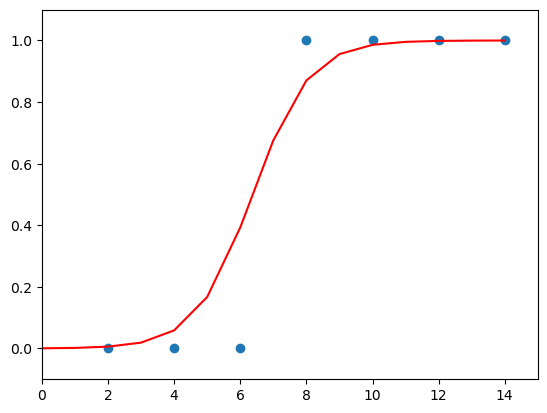

In [133]:
x_data_ = np.arange(0,15,1)
x_data_scatter = data[:,0]
y_data_scatter = data[:,1]

a, b = 0, 0
lr = 0.05

for i in range(501):
    for x_data, y_data in data:
        a,b = updates(x_data, y_data, a, b, lr)
    
    if i % 100 == 0:
        print(f'epoch={i}, slope={a}, intercept={b}')
        plt.scatter(x_data_scatter, y_data_scatter)
        plt.plot(x_data_, sigmoid(a * x_data_ + b), c='red')
        plt.xlim(0, 15)
        plt.ylim(-0.1, 1.1)
        plt.show()
        plt.pause(1)
        clear_output(wait = True)